In [16]:
from pathlib import Path
import pandas as pd
import numpy as np
from synthetic_data_generator import load_config, generate_base_dataframe, generate_state_effects, generate_marketing_spend, generate_control_variables, generate_sales
import os
import configparser
from loguru import logger
import matplotlib.pyplot as pp  
import seaborn as sb

In [17]:
project_path = Path.cwd()
data_save_path = project_path  / 'data' / 'simulated'

In [19]:
config_file = 'dgp_config.ini'
if not (project_path / config_file).exists():
    # Check if the configuration file exists, if not, create a default one
    config = configparser.ConfigParser()
    config['dgp'] = {
        'true_base_intercept': 50,
        'true_tv_effect_base': 0.6,
        'true_digital_effect_base': 0.9,
        'true_radio_effect_base': 0.25,
        'true_social_effect_base': 0.7,
        'true_price_effect': -1.5,
        'true_seasonality_effect': 0.4,
        'true_economic_effect': 0.15,
        'true_error_sd': 8,
        'true_tv_effect_sd': 0.08,
        'true_digital_effect_sd': 0.12,
        'true_radio_effect_sd': 0.05,
        'true_social_effect_sd': 0.1,
        'min_price': 10,
        'max_price': 30,
        'seasonality_amplitude': 50,
        'seasonality_period': 52,
        'seasonality_baseline': 100,
        'economic_index_mean': 100,
        'economic_index_sd': 10
    }
    config['states'] = {
        'list': 'Arizona, Maryland, Texas, California, Florida, New York'
    }
    with open(config_file, 'w') as configfile:
        config.write(configfile)
    logger.info(f"Default '{config_file}' file created. Please modify it as needed in the same directory as your notebook.")

# Load configuration
dgp_params, states_list = load_config(config_file)

# Generate the base DataFrame
synthetic_data = generate_base_dataframe(states_list)

# Generate state-level effects
state_effects_data = generate_state_effects(dgp_params, states_list)

# Generate marketing spend data
synthetic_data = generate_marketing_spend(synthetic_data)

# Generate control variable data
synthetic_data = generate_control_variables(synthetic_data, dgp_params)

# Generate sales data
synthetic_data['Sales'] = synthetic_data.apply(
    generate_sales, axis=1, dgp_params=dgp_params, state_effects=state_effects_data)

logger.info(f"Default '{config_file}' file created.")

logger.info("\nFirst few rows of the synthetic dataset:")
logger.info(synthetic_data.head())
logger.info("\nLoaded DGP Parameters:")
logger.info(dgp_params)
logger.info("\nLoaded States:")
logger.info(states_list)

2025-05-07 13:20:52.128 | INFO     | __main__:<module>:32 - Default 'dgp_config.ini' file created. Please modify it as needed in the same directory as your notebook.
2025-05-07 13:20:52.148 | INFO     | __main__:<module>:53 - Default 'dgp_config.ini' file created.
2025-05-07 13:20:52.149 | INFO     | __main__:<module>:55 - 
First few rows of the synthetic dataset:
2025-05-07 13:20:52.149 | INFO     | __main__:<module>:56 -      State       Date  Time    TV_Spend  Digital_Spend  Radio_Spend  \
0  Arizona 2025-01-01     0  425.609790     216.181028    69.360502   
1  Arizona 2025-01-08     1  305.436908     158.998913    41.054692   
2  Arizona 2025-01-15     2  364.342642     471.950761    40.834016   
3  Arizona 2025-01-22     3  667.878511     458.604988   191.468486   
4  Arizona 2025-01-29     4  182.894446     206.958792   165.552701   

   Social_Spend  TV_Spend_Log  Digital_Spend_Log  Radio_Spend_Log  \
0    379.818530      6.055870           5.380731         4.253632   
1    391

In [20]:
data.head()

,State,Date,Time,TV_Spend,Digital_Spend,Radio_Spend,Social_Spend,TV_Spend_Log,Digital_Spend_Log,Radio_Spend_Log,Social_Spend_Log,Price,Seasonality,Economic_Index,Sales
0,Arizona,2024-01-01,0,715.809724,276.411316,129.039467,102.451857,6.574810,5.625501,4.867838,4.639106,11.757330,100.000000,94.183191,145.254067
1,Arizona,2024-01-08,1,496.137244,435.420429,62.700823,268.830112,6.208866,6.078606,4.154197,5.597793,17.012539,106.026834,89.852433,147.438714
2,Arizona,2024-01-15,2,209.834411,346.412134,38.320845,508.456110,5.351073,5.850512,3.671755,6.233344,10.664062,111.965783,93.507225,164.195320
3,Arizona,2024-01-22,3,545.659219,123.320492,47.514645,117.026586,6.303826,4.822863,3.881866,4.770910,11.571570,117.730244,87.760597,146.281156
4,Arizona,2024-01-29,4,130.949669,81.755936,64.272391,437.383698,4.882421,4.415896,4.178569,6.083095,17.938466,123.236159,100.340835,166.603471


<Axes: xlabel='Date', ylabel='Digital_Spend_Log'>

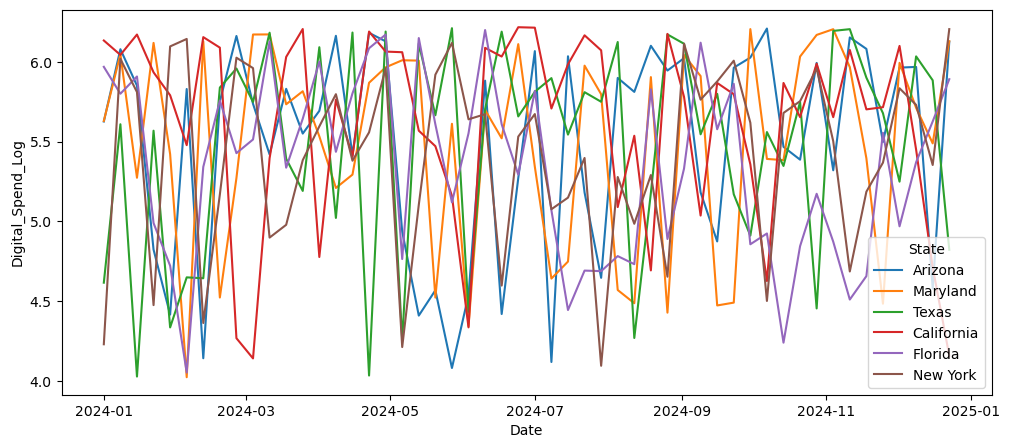

In [21]:
f, ax = pp.subplots(figsize=(12, 5))
sb.lineplot(data, x='Date', y='Digital_Spend_Log', hue='State', ax=ax)

## Overview of MMM

* Statistical Approach:

    * Frequentist vs. Bayesian

    * Econometric vs. Statistical: Some MMMs are heavily influenced by econometrics, focusing on causal inference and satisfying economic assumptions. Others are more statistically oriented, emphasizing prediction accuracy.

* Model Structure:

    * Linear vs. Non-linear: The relationship between marketing and sales can be modeled as linear (as in our example) or non-linear. Non-linear models can capture diminishing returns or saturation effects more effectively.

    * Additive vs. Multiplicative: In an additive model, the effects of different channels are added together. In a multiplicative model, they are multiplied. Multiplicative models are often used to represent interactions between channels.

    * With or without Interaction Effects: Some models include interaction terms to capture how the effect of one channel might depend on the level of spending in another.

* Time Dependence:

    * Static vs. Dynamic: Static models assume that the effect of marketing is immediate, while dynamic models incorporate lagged effects (like the adstock transformation in our example) to account for how marketing's influence persists over time.

* Level of Aggregation:

    * Aggregate vs. Disaggregate: Most MMMs operate at an aggregate level (e.g., weekly sales), but some can incorporate more granular data, such as regional or even customer-level information.

* Media Effects Modeling:

    * Adstock vs. Other Transformations: While adstock is common, other transformations can be used to model media effects, such as the Hill function or other custom decay functions.

The model I examine belongs to the following categories:

* Bayesian
* Statistical
* Non-linear (due to the log transformation of spend)
* Additive
* Dynamic (due to the adstock transformation)
* Aggregate

In summary, it's a common type of MMM, but certainly not the only one.

### Attempting to recover the data generation process parameters:

#### Type of MMM Model:

##### The MMM model implemented in the code has the following key characteristics:

* <u>**Bayesian**</u>: It's a Bayesian MMM, which means that it uses Bayesian statistics to estimate the model parameters. Instead of providing single "point estimates" for the parameters (like in traditional frequentist statistics), it returns probability distributions (posterior distributions) that represent our uncertainty about the parameter values. This allows for more robust inference and the ability to quantify uncertainty. We achieve this using the pymc library.
* <u>**Hierarchical**</u>: It's a hierarchical model. This is a crucial aspect, as it allows the model to account for variations in marketing effectiveness across different states.  The model doesn't assume that the effect of TV advertising (or any other channel) is the same in Arizona as it is in New York. Instead, it assumes that the state-level effects are drawn from a common distribution, which allows the model to "learn" both the overall average effect and how that effect varies by state.  This is achieved by defining hyperpriors for the state-level parameters (alpha and beta).
* <u>**Regression-Based**</u>: At its core, the model uses a regression framework to relate marketing spend and other factors to sales. The general form of the model is: 

$$Sales = Base + Σ(Channel Effect) + Control Variable Effects + Error$$

##### Where:

<br> $\rightarrow$ $Base$ represents the baseline sales level. 
<br> $\rightarrow$ $Channel Effect$ represents the impact of each marketing channel's spend on sales (incorporating adstock).
<br> $\rightarrow$ $Control Variable Effects$ represents the impact of other factors like price, seasonality, and economic indicators.
<br> $\rightarrow$ $Error$ represents the unexplained variation in sales.

* <u>**Adstock Transformation**</u>: The model incorporates an adstock transformation to account for the lagged effects of advertising.  Marketing doesn't have an immediate impact; its effect often persists over time.  The effects.adstock function from pymc_marketing is used to model this diminishing carryover effect. 

* <u>**Log-Linear**</u>: The model uses log-transformed marketing spend (TV_Spend_Log, Digital_Spend_Log, etc.).  This is a common practice in MMM to model diminishing returns, meaning that the impact of an additional dollar of advertising spend decreases as the spend level increases.In summary, this is a Bayesian Hierarchical Log-Linear Regression Model with Adstock Transformation.